# Generative Adversarial Networks (GANs)
Generative adversarial networks are neural networks which is able to generate materials such as - images, music, speech or text, which is similar to what humans are able to produce. It is an active topic of research in recent times. In this tutorial, I will show you how GANs work and also will teach you to implement generative models.

GANs consists of 2 neural networks - one trained to generate data and the other one is trained to distinguish fake data from real data. The latter one provides the adversarial nature of the model.

## Difference between Discriminative and Generative models
Discriminative models are used for most supervised classification or regression problems. For example - you have used discriminative models to classify labelled images of handwritten digits from 0 to 9.

Generative models like GANs are trained to describe how a dataset is generated in terms of probabilistic model. By sampling from a generative model, you are able to generate new data. On the other hand, discriminative models are used for supervised learning. Generative models are often used with unlabelled dataset and can be seen as a form of unsupervised learning. We can actually use the dataset of handwriiten digits to train a generative model to generate new digits. During training, some algorithms are used to adjust the model's parameters to minimize a loss function and learn the probability distribution of the training set, and the model trained is used to generate new samples. To output new samples, generative models usually consider a stochastic, or random element that influences the samples generated by the model. The random samples used to drive the generator are obtained from a latent spae in which the vectors represent a kind of compressed form of the generative samples. Generative models can also be used for labelled datasets, but in general, discriminative models work better for classification. GANs have recieved a lot of attention in recent times, but they are not the only architecture that can be used as a generative model. There are other generative model architectures such as - Boltzmann machines, variational autoencoders, Hidden markov models, GPT-2, etc.

In [1]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt

Random generator seed ensures that the experiment can be replicated in any macine. The number 111 represents the random seed used to initialize the random number generator which is later used to initialize neural network's weights.

In [2]:
torch.manual_seed(111)

In [3]:
train_data_length = 1024
train_data = torch.zeros((train_data_length, 2))
train_data[:, 0] = 2 * math.pi * torch.rand(train_data_length)
train_data[:, 1] = torch.sin(train_data[:, 0])
train_labels = torch.zeros(train_data_length)
train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)
]

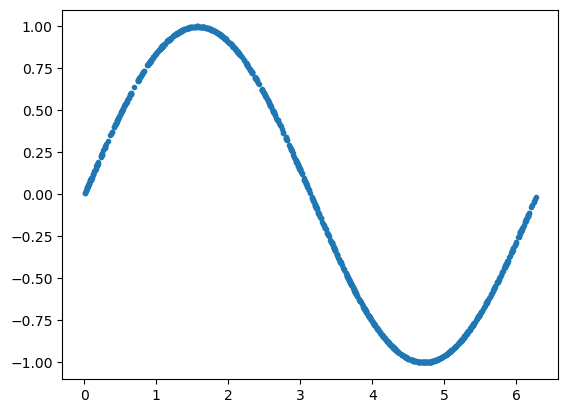

In [4]:
plt.plot(train_data[:, 0], train_data[:, 1], ".")

## Prepare the training data

In [5]:
train_data_length = 1024
train_data = torch.zeros((train_data_length, 2))
train_data[:, 0] = 2 * math.pi * torch.rand(train_data_length)
train_data[:, 1] = torch.sin(train_data[:, 0])
train_labels = torch.zeros(train_data_length)
train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)
]

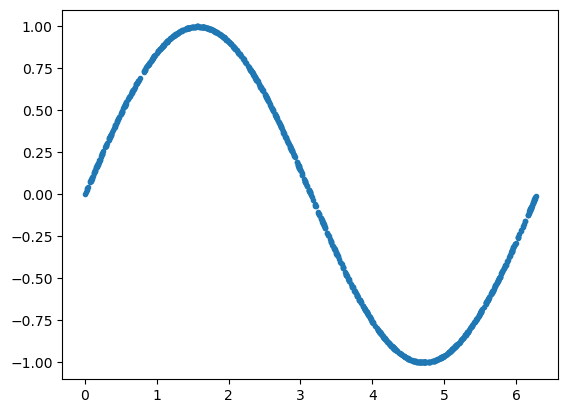

In [6]:
plt.plot(train_data[:, 0], train_data[:, 1], ".")

In [7]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

## Implementing the discriminator

In [8]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        output = self.model(x)
        return output

In [9]:
discriminator = Discriminator()

## Implementing the Generator

In [10]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 2),
        )

    def forward(self, x):
        output = self.model(x)
        return output

generator = Generator()

## Training the model

In [11]:
lr = 0.001
num_epochs = 300
loss_function = nn.BCELoss()

In [12]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [13]:
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # Data for training the discriminator
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels)
        )

        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Data for training the generator
        latent_space_samples = torch.randn((batch_size, 2))

        # Training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels
        )
        loss_generator.backward()
        optimizer_generator.step()

        # Show loss
        if epoch % 10 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}")

Epoch: 0 Loss D.: 0.28119027614593506
Epoch: 0 Loss G.: 2.6877620220184326
Epoch: 10 Loss D.: 0.6687881350517273
Epoch: 10 Loss G.: 0.7874056696891785
Epoch: 20 Loss D.: 0.6912797093391418
Epoch: 20 Loss G.: 0.980526328086853
Epoch: 30 Loss D.: 0.5846414566040039
Epoch: 30 Loss G.: 0.8476249575614929
Epoch: 40 Loss D.: 0.6902879476547241
Epoch: 40 Loss G.: 0.6595153212547302
Epoch: 50 Loss D.: 0.6887678503990173
Epoch: 50 Loss G.: 0.6790732145309448
Epoch: 60 Loss D.: 0.6998262405395508
Epoch: 60 Loss G.: 0.6136289238929749
Epoch: 70 Loss D.: 0.6855952739715576
Epoch: 70 Loss G.: 0.6826961040496826
Epoch: 80 Loss D.: 0.7052231431007385
Epoch: 80 Loss G.: 0.6167730093002319
Epoch: 90 Loss D.: 0.6961537599563599
Epoch: 90 Loss G.: 0.6777110695838928
Epoch: 100 Loss D.: 0.692301332950592
Epoch: 100 Loss G.: 0.6973769664764404
Epoch: 110 Loss D.: 0.6882683038711548
Epoch: 110 Loss G.: 0.6973747611045837
Epoch: 120 Loss D.: 0.739089846611023
Epoch: 120 Loss G.: 0.6803098917007446
Epoch: 130

## Check the sample generated

In [14]:
latent_space_samples = torch.randn(100, 2)
generated_samples = generator(latent_space_samples)

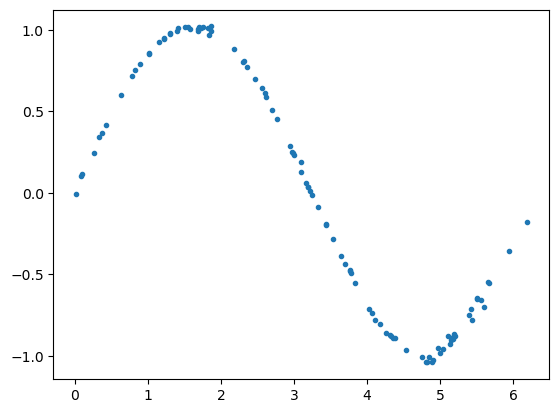

In [15]:
generated_samples = generated_samples.detach()
plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")